from sklearn.preprocessing import

In [83]:
import sklearn as sk
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [85]:
iris=pd.read_csv("C:\\Users\\moham\\Downloads\\cancer.csv")
iris.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [86]:
iris["Diagnosis"] = iris["Diagnosis"].replace("M", 1)
iris["Diagnosis"] = iris["Diagnosis"].replace("B", 0)

C:\Users\moham\AppData\Local\Temp\ipykernel_2296\3106347689.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris["Diagnosis"] = iris["Diagnosis"].replace("B", 0)


In [87]:
Imp_X = iris.columns[[2,4,5,8,9,23,25,26,30]]
X = iris[Imp_X]
X


,Radius (mean),Perimeter (mean),Area (mean),Concavity (mean),Concave points (mean),Texture (worst),Area (worst),Smoothness (worst),Symmetry (worst)
0,13.540,87.46,566.3,0.06664,0.047810,19.26,711.2,0.14400,0.2977
1,13.080,85.63,520.0,0.04568,0.031100,20.49,630.5,0.13120,0.3184
2,9.504,60.34,273.9,0.02956,0.020760,15.66,314.9,0.13240,0.2450
3,13.030,82.61,523.8,0.02562,0.029230,22.81,545.9,0.09701,0.1987
4,8.196,51.71,201.9,0.01588,0.005917,21.96,242.2,0.12970,0.3105
...,...,...,...,...,...,...,...,...,...
564,20.920,143.00,1347.0,0.31740,0.147400,29.41,1819.0,0.14070,0.2929
565,21.560,142.00,1479.0,0.24390,0.138900,26.40,2027.0,0.14100,0.2060
566,20.130,131.20,1261.0,0.14400,0.097910,38.25,1731.0,0.11660,0.2572
567,16.600,108.30,858.1,0.09251,0.053020,34.12,1124.0,0.11390,0.2218


In [88]:
iris.shape

(569, 32)

In [89]:
X.shape

(569, 9)

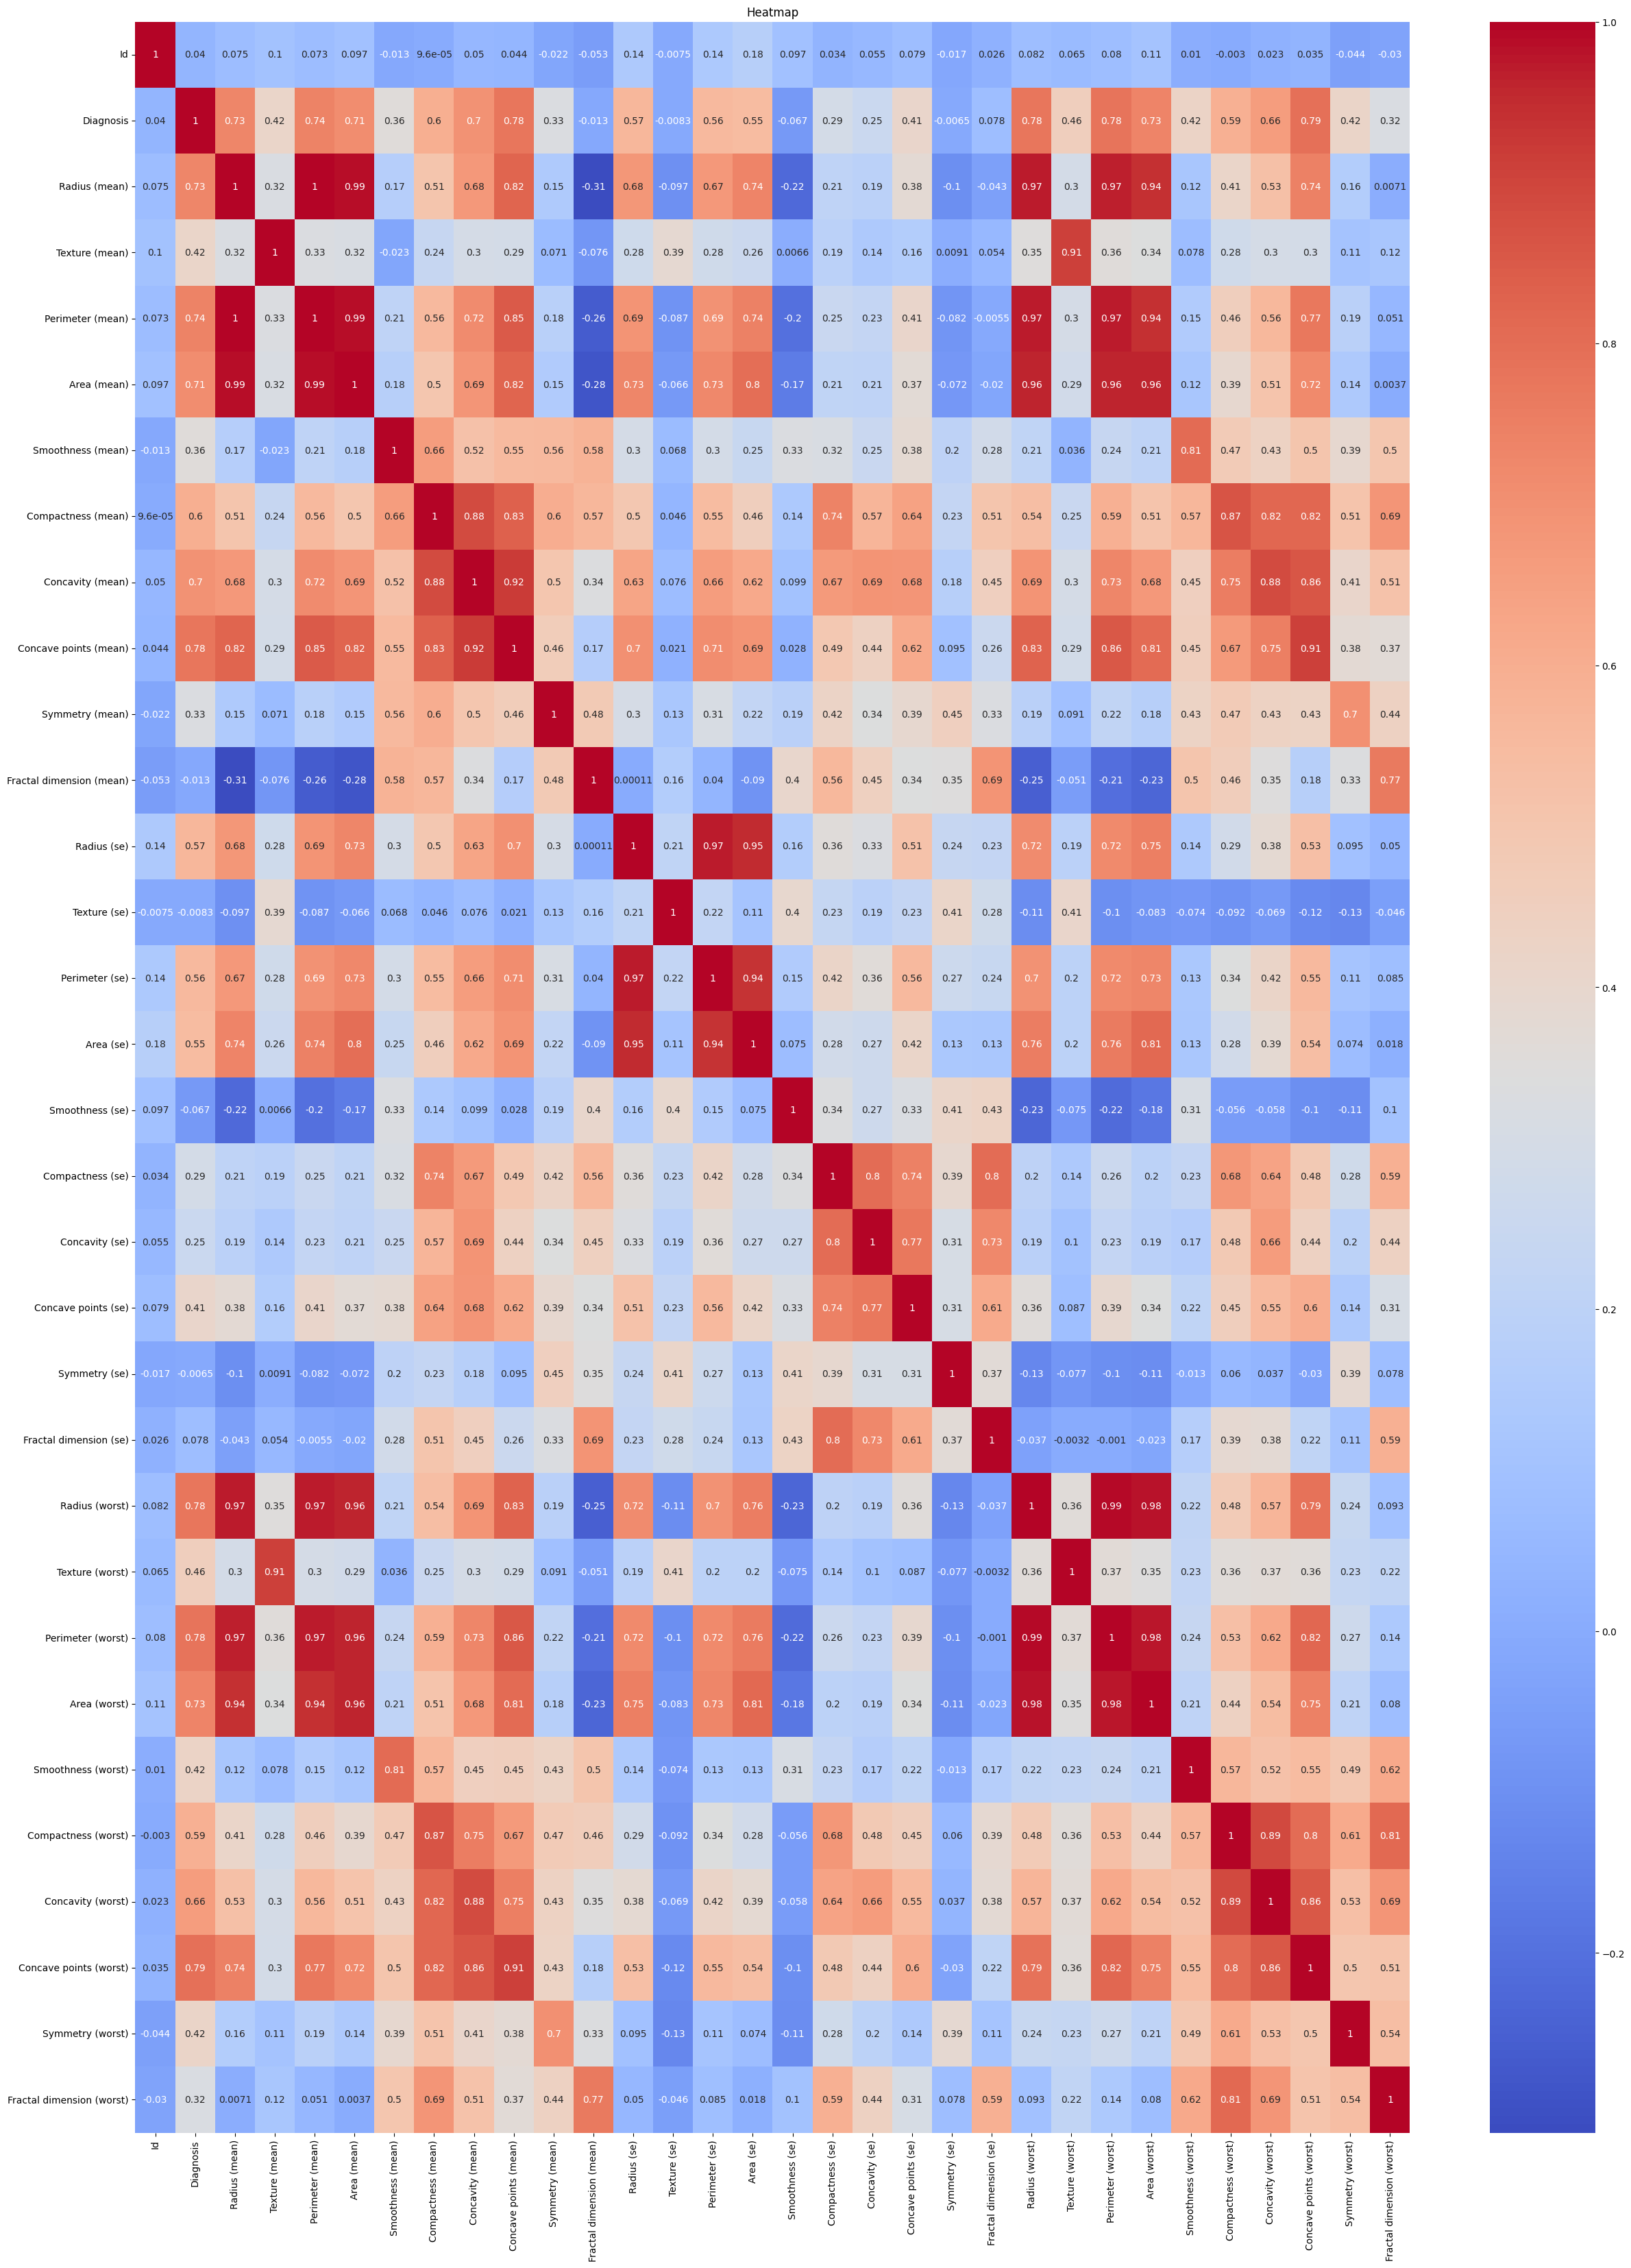

In [90]:
plt.figure(figsize=(30, 40))  
corr = iris.corr(numeric_only= True)
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Heatmap")
plt.show()

In [91]:
y_train = iris['Diagnosis']
y_train.shape

(569,)

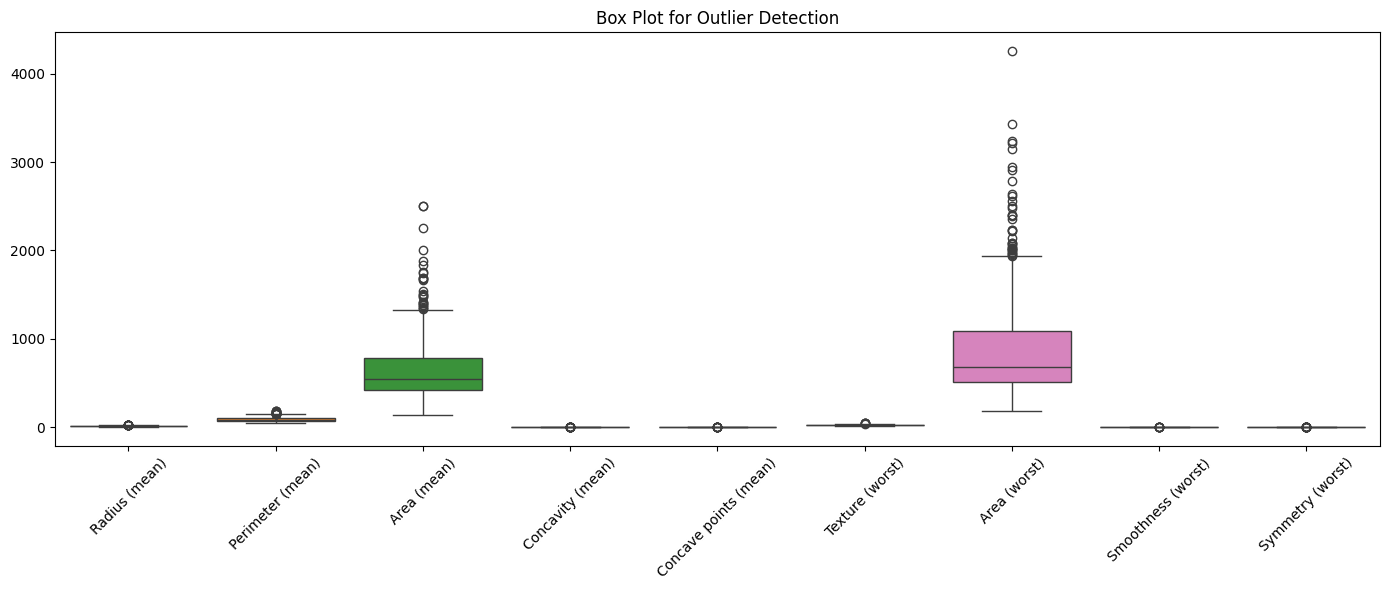

In [92]:
# Visualize all selected features
plt.figure(figsize=(14, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.tight_layout()
plt.show()

In [93]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(),
)



In [94]:

pipe.fit(X,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [95]:
pred = pipe.predict(X)

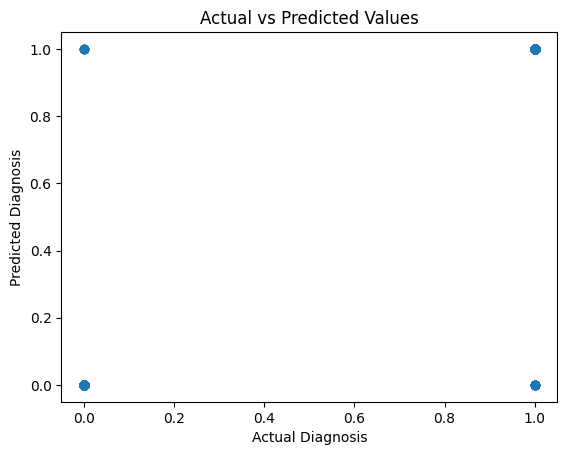

In [96]:
plt.scatter(y_train, pred)
plt.xlabel("Actual Diagnosis")
plt.ylabel("Predicted Diagnosis")
plt.title("Actual vs Predicted Values")
plt.show()

In [97]:
X.shape

(569, 9)

In [98]:
pred.shape

(569,)

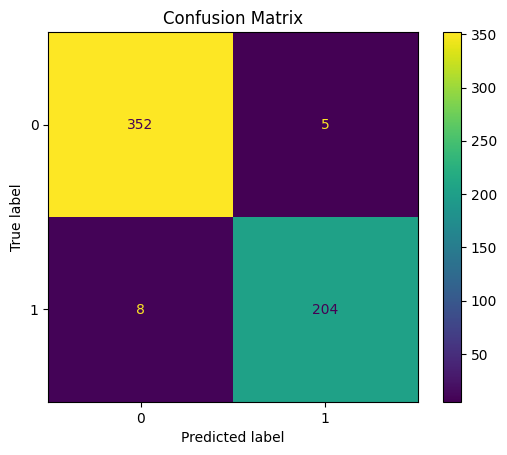

In [99]:
cm = confusion_matrix(y_train,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [100]:
y2 = StandardScaler().fit(X).transform(X)

## 

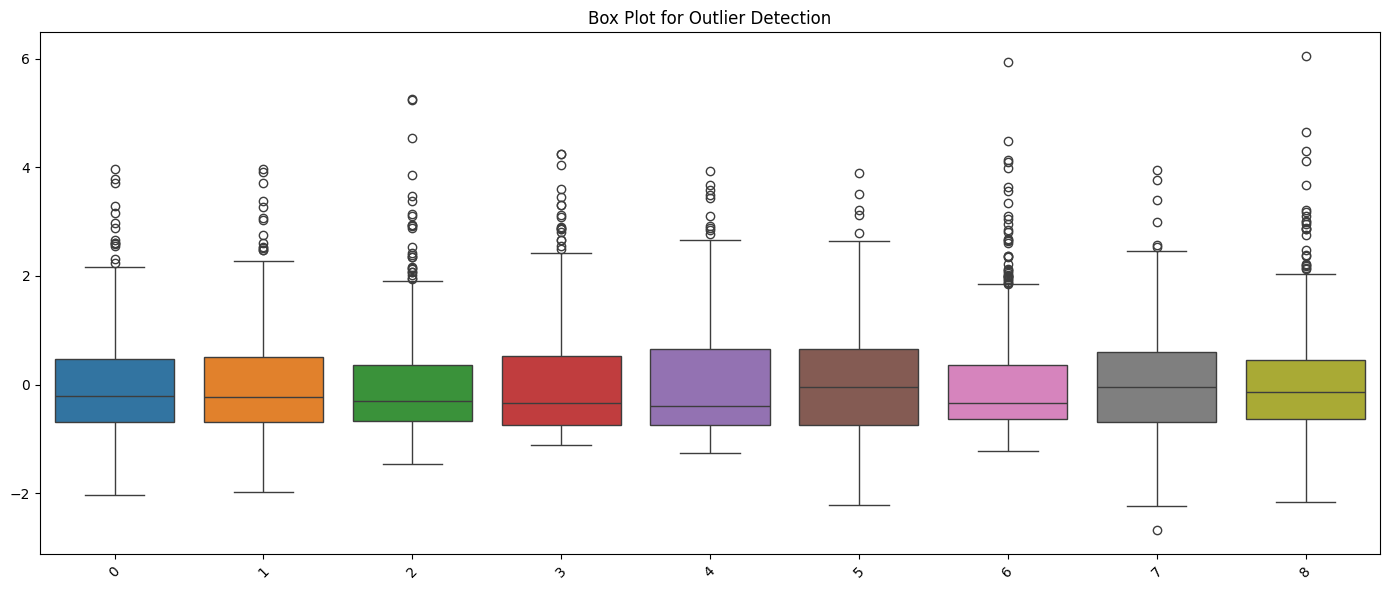

In [102]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=y2)
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.tight_layout()
plt.show()

In [103]:
y_train.shape

(569,)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=30)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


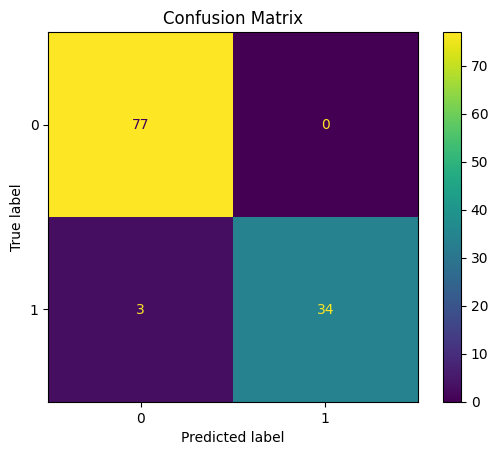

In [105]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()